# Quick introduction to GeoPandas
From the [GeoPandas documentation](http://geopandas.org/):
> GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends  the datatypes used by [pandas](http://pandas.pydata.org) to allow spatial operations on geometric types. Geometric operations are performed by [shapely](http://toblerity.github.io/shapely). Geopandas further depends on [fiona](http://toblerity.github.io/fiona) for file access and [descartes](https://pypi.python.org/pypi/descartes) and [matplotlib](http://matplotlib.org) for plotting.

## Creating a GeoDataFrame from a DataFrame with coordinates

In [2]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

The variable below named *car* is an example of a Python **dictionary**. Dictionaries are wrapped with curly braces "{}" and use keys to reference values. Numbers or strings can be used as keys.
```Python
car = {
    "make": "toyota",  # key: value
    "color": "silver",  # key: value
    "miles": 50  # key: value
}
```
As you can see above, *car* has three keys: make, color, and miles. The values do not have to be the same type - in this case two are strings and one an integer.

In [22]:
car = {"make": "toyota", "color": "silver", "miles": 50}

# Dictionaries have a built-in method call "keys" that returns the key names
print(car.keys())

# Values can be looked up by using keys
print(f'make: {car["make"]}')

# New keys can be added to an existing dictionary
car["model"] = "prius"
print(car.keys())

# An existing key's value can be updated
print(f'color: {car["color"]}')
car["color"] = "red"
print(f'color: {car["color"]}')

dict_keys(['make', 'color', 'miles'])
make: toyota
dict_keys(['make', 'color', 'miles', 'model'])
color: silver
color: red


In [23]:
# Dictionary containing information on five cities located in South America
city_data = {
    'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
    'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
    'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
    'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]
}
# Pandas DataFrame created from the dictionary
df = pd.DataFrame(city_data)
print(df.head())

           City    Country  Latitude  Longitude
0  Buenos Aires  Argentina    -34.58     -58.66
1      Brasilia     Brazil    -15.78     -47.91
2      Santiago      Chile    -33.45     -70.66
3        Bogota   Colombia      4.60     -74.08
4       Caracas  Venezuela     10.48     -66.86


In [29]:
# GeoDataFrame's require spatial information to be in a specific format
# The follow three lines creates shapely point objects for the lat/lon
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
print(gdf.head(1))
print(type(gdf['Coordinates'].values[0]))

           City    Country  Latitude  Longitude            Coordinates
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66 -34.58)
<class 'shapely.geometry.point.Point'>


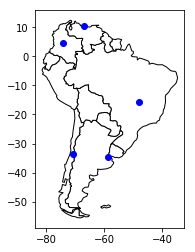

In [31]:
# GeoPandas has a few built-in datasets you can access at any time
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Restricting the world map extent to the continent of South America and
# styling the fill and stroke (edge) colors
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# Plotting the city data with blue points
gdf.plot(ax=ax, color='blue')

plt.show()